In [1]:
#https://www.esrl.noaa.gov/psd/enso/mei/
#https://www.esrl.noaa.gov/psd/enso/mei.ext/table.ext.html



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import datetime
from scipy import stats
from LOTUS_regression.regression import mzm_regression
from LOTUS_regression.predictors import load_data
from LOTUS_regression.predictors.seasonal import add_seasonal_components
import LOTUS_regression.tests as tests

In [3]:
columnStr = ['DJ','JF','FM','MA','AM','MJ','JJ','JA','AS','SO','ON','ND']

df = pd.read_csv('/home/poyraden/MLR_Uccle/Codes/Files/teleconnection_indices/enso_MEI_data2018UPDATE.txt',
                   sep = "\s *", engine="python", skiprows=1, names=columnStr)
df[-10:], len(df)
#df.loc[1979], df.loc[1979][1]

(         DJ     JF     FM     MA     AM     MJ     JJ     JA     AS     SO  \
 2009 -0.714 -0.690 -0.705 -0.106  0.326  0.751  1.060  1.050  0.707  0.883   
 2010  1.066  1.526  1.462  0.978  0.658 -0.228 -1.103 -1.671 -1.879 -1.892   
 2011 -1.719 -1.544 -1.554 -1.387 -0.199 -0.003 -0.193 -0.517 -0.778 -0.939   
 2012 -0.980 -0.675 -0.382  0.110  0.757  0.842  1.126  0.607  0.316  0.069   
 2013  0.103 -0.068 -0.026  0.090  0.205 -0.094 -0.314 -0.481 -0.155  0.115   
 2014 -0.270 -0.259  0.018  0.295  1.001  1.046  0.915  0.937  0.557  0.421   
 2015  0.417  0.464  0.614  0.916  1.583  2.097  1.981  2.334  2.479  2.201   
 2016  2.216  2.170  1.963  2.094  1.752  1.053  0.352  0.167 -0.118 -0.385   
 2017 -0.052 -0.043 -0.080  0.744  1.445  1.039  0.456  0.009 -0.478 -0.568   
 2018 -0.623 -0.731 -0.502 -0.432  0.465  0.469  0.076  0.132  0.509  0.468   
 
          ON     ND  
 2009  1.107  1.059  
 2010 -1.477 -1.558  
 2011 -0.938 -0.945  
 2012  0.127  0.111  
 2013 -0.053 -0.234

In [4]:
year = df.index.tolist()
print(year)
tot = len(year)
date = [[0] * 12] * tot
index = [[''] * 12] * tot



[1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]


In [5]:
indv = []
datev = []

for y in range(tot):
    for m in range(12):
        date[y][m] = df.loc[year[y]][m]
        index[y][m] = str(year[y])+'-'+str(m+1)+'-01'
        if(y < 3):print(y,m,year[y], date[y][m], index[y][m])
        indv.append(index[y][m])
        datev.append(date[y][m])
            
        #print(year[y], df.loc[year[y]][m])
print(len(datev),datev)
print(len(indv), indv)

0 0 1951 -1.049 1951-1-01
0 1 1951 -1.152 1951-2-01
0 2 1951 -1.178 1951-3-01
0 3 1951 -0.511 1951-4-01
0 4 1951 -0.374 1951-5-01
0 5 1951 0.288 1951-6-01
0 6 1951 0.679 1951-7-01
0 7 1951 0.818 1951-8-01
0 8 1951 0.726 1951-9-01
0 9 1951 0.72 1951-10-01
0 10 1951 0.694 1951-11-01
0 11 1951 0.504 1951-12-01
1 0 1952 0.433 1952-1-01
1 1 1952 0.138 1952-2-01
1 2 1952 0.071 1952-3-01
1 3 1952 0.224 1952-4-01
1 4 1952 -0.307 1952-5-01
1 5 1952 -0.756 1952-6-01
1 6 1952 -0.305 1952-7-01
1 7 1952 -0.374 1952-8-01
1 8 1952 0.31 1952-9-01
1 9 1952 0.265 1952-10-01
1 10 1952 -0.351 1952-11-01
1 11 1952 -0.098 1952-12-01
2 0 1953 0.044 1953-1-01
2 1 1953 0.401 1953-2-01
2 2 1953 0.277 1953-3-01
2 3 1953 0.687 1953-4-01
2 4 1953 0.756 1953-5-01
2 5 1953 0.191 1953-6-01
2 6 1953 0.382 1953-7-01
2 7 1953 0.209 1953-8-01
2 8 1953 0.483 1953-9-01
2 9 1953 0.087 1953-10-01
2 10 1953 0.078 1953-11-01
2 11 1953 0.351 1953-12-01
816 [-1.0490000000000002, -1.1520000000000001, -1.1779999999999999, -0.51100

In [10]:
df_ds = pd.DataFrame( columns = ['ind','enso_mei'])
#df_ds = pd.DataFrame( 'enso_ds': datev)

df_ds['ind'] = indv
df_ds['ind'] = pd.to_datetime(df_ds['ind'], format='%Y-%m')
df_ds['enso_mei'] = datev
df_ds.set_index('ind', inplace=True)
df_ds['1979-02-01':]

,enso_mei
ind,
1979-02-01,0.379
1979-03-01,0.002
1979-04-01,0.301
1979-05-01,0.374
1979-06-01,0.429
1979-07-01,0.396
1979-08-01,0.615
1979-09-01,0.759
1979-10-01,0.655


In [7]:
df_ds.to_csv('/home/poyraden/MLR_Uccle/Files/enso_deniz.csv')

['enso', 'trop', 'solar', 'qboA', 'qboB', 'aod', 'linear_pre', 'linear_post', 'pre_const', 'post_const', 'gap_cons']


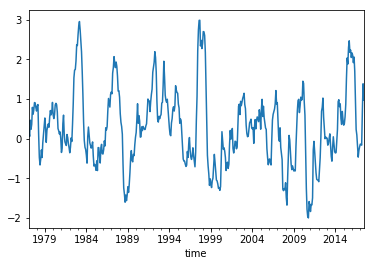

In [8]:
predictors = load_data('pred_baseline_ilt.csv')
print(list(predictors))
predictors.enso.plot()

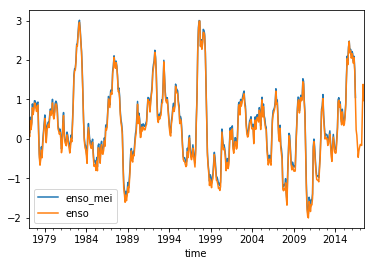

In [11]:
df_ds[df_ds['enso_mei'] > -99].loc['1977-02-01':'2016-06-01'].plot()
predictors.enso.plot(legend = 'enso')
plt.savefig('ENSO_mei.pdf')

In [17]:
mei2 = pd.read_csv('/home/poyraden/MLR_Uccle/Files/enso_meiv2.csv')
mei2['ind'] = pd.to_datetime(mei2['ind'], format='%Y-%m')
mei2.set_index('ind', inplace=True)


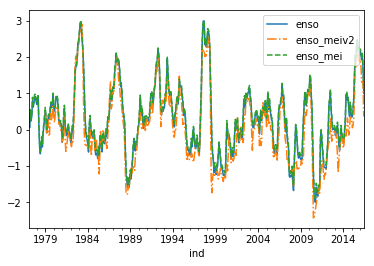

In [35]:
ax = plt.gca()
predictors.loc['1977-02-01':'2016-06-01'].enso.plot(legend = 'enso',ax=ax)

mei2[mei2['enso_meiv2'] > -99].loc['1977-02-01':'2016-06-01'].plot(legend = 'enso_mei2',ax=ax, style = "-.")
df_ds[df_ds['enso_mei'] > -99].loc['1977-02-01':'2016-06-01'].plot(legend = 'enso_mei',ax=ax, style = "--")
plt.savefig('ENSO.pdf')